In [2]:
import numpy as np
import keras
from keras.models import load_model
import csv
from createdatas import gaussian_beam, createdata
from createdatas2 import createdata2
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    # フィッティング用
date = str(datetime.date.today())
print(date)

import os #システム操作系
from pathlib import Path #ファイル操作系

Using TensorFlow backend.


2020-11-17


In [3]:
#　テストデータ生成
file_num = 20 #テストファイル数20
test_num = 101 #データ数(0%~100%)
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, 4))
fit_param_y = np.zeros((file_num, 4))

t_101 = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))
x_101 = np.zeros((file_num, test_num, data_size))
y_101 = np.zeros((file_num, test_num, data_size))
n = range(0, file_num)
test_nums = range(0, test_num)


for NOISE in range(0, test_num):
    createdata2(file_num, NOISE, data_size, x_101[:,NOISE,:], y_101[:,NOISE,:], t_101[:,NOISE,:], ty[:,NOISE,:], fit_param_x, fit_param_y)

t_101 = t_101.T[1].T
print(x_101.shape)
print(t_101.shape)

経過時間:0.0576481819152832[sec]
平均絶対誤差: 0.000000 ± 0.000000
経過時間:0.04462575912475586[sec]
平均絶対誤差: 0.003069 ± 0.001832
経過時間:0.03569173812866211[sec]
平均絶対誤差: 0.006757 ± 0.005590
経過時間:0.04081988334655762[sec]
平均絶対誤差: 0.009697 ± 0.008601
経過時間:0.05185890197753906[sec]
平均絶対誤差: 0.017813 ± 0.011894
経過時間:0.04664182662963867[sec]
平均絶対誤差: 0.018301 ± 0.010381
経過時間:0.05829787254333496[sec]
平均絶対誤差: 0.025641 ± 0.017605
経過時間:0.0393369197845459[sec]
平均絶対誤差: 0.021408 ± 0.019779
経過時間:0.06622695922851562[sec]
平均絶対誤差: 0.026248 ± 0.025897
経過時間:0.08080101013183594[sec]
平均絶対誤差: 0.037541 ± 0.028963
経過時間:0.06638002395629883[sec]
平均絶対誤差: 0.042696 ± 0.041916
経過時間:0.038012027740478516[sec]
平均絶対誤差: 0.045404 ± 0.037590
経過時間:0.04698586463928223[sec]
平均絶対誤差: 0.050503 ± 0.037135
経過時間:0.04152226448059082[sec]
平均絶対誤差: 0.028332 ± 0.023892
経過時間:0.051651954650878906[sec]
平均絶対誤差: 0.048164 ± 0.030146
経過時間:0.08840584754943848[sec]
平均絶対誤差: 0.063199 ± 0.055889
経過時間:0.05341291427612305[sec]
平均絶対誤差: 0.072697 ± 0.048733
経過時間:0.0419850

In [4]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig100%


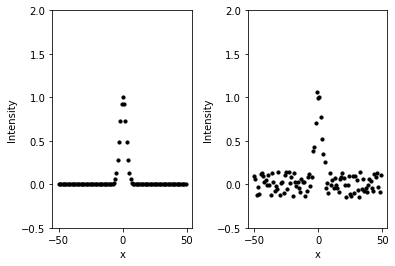

In [5]:
#表示
x_array = np.arange(-50, 50, 1.0)   
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.scatter(x_array, x_101[0][0],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.scatter(x_array, x_101[0][30],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity')
plt.ylim(-0.5, 2.0)
plt.show()
plt.close()


現在時刻： 2020-11-04 16:02:19.873349
保存ファイル名： 2020-11-04_16-02.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-04_16-02.svg


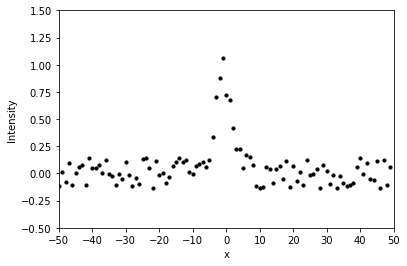

In [19]:
#画像保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

plt.scatter(x_array, x_101[0][30],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity')
plt.xlim(-50.0, 50.0)
plt.xticks(np.arange(-50,50+1,10))
plt.ylim(-0.5, 1.5)
plt.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()

In [25]:
save_data = np.zeros((2, data_size))
save_data[0] = x_array.flatten()
save_data[1] = x_101[0][30].flatten()
print(save_data.shape)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.csv'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

with open(save_file,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

(2, 100)
保存ファイル名： 2020-11-04_16-02.csv
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-04_16-02.csv


In [2]:
NOISE = 80
print(NOISE)
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn1.h5"
model = load_model(save_model_path)

80


NameError: name 'file_num' is not defined

In [13]:
#学習パラメータの取得
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201109/2020-11-09-80%cnn1.h5"
model = load_model(save_model_path)

In [8]:
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201109/2020-11-09-10%cnn1.h5"
model = load_model(save_model_path)

In [4]:
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201109/2020-11-09-30%cnn3.h5"
model = load_model(save_model_path)

In [5]:
save_model_path ="/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-17_14-45_noise80.h5"
model = load_model(save_model_path)

In [6]:
ave_101 = np.zeros(test_num)
std_101 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))
pred_x = np.zeros((file_num ,test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x.shape)
ave_101 = np.average(error, axis=0)
std_101 = np.std(error, axis=0)

ValueError: could not broadcast input array from shape (303) into shape (101)

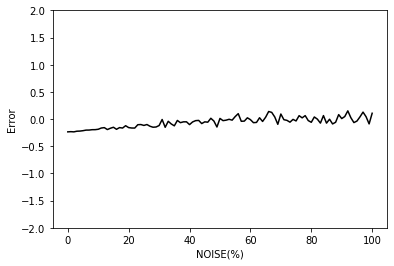

0%:-0.23503905534744263±0.0
10%:-0.18742455840110778±0.08395317481113
20%:-0.1567281275987625±0.13235443681649722
30%:-0.11879226863384247±0.16758631042154415
40%:-0.10179687738418579±0.13849594526420067
50%:0.011960738897323608±0.15551629852439994
60%:-0.010339498519897461±0.2108807066170571
70%:0.09306462705135346±0.1576391247234535
80%:-0.059223732352256774±0.27080634277514903
90%:0.009268426895141601±0.3331438380434083
100%:0.10728889107704162±0.3521887165597546


In [15]:
#結果の表示
plt.plot(test_nums, ave_101,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101[i])+ "±" + str(std_101[i])
    print(print_ave)

In [16]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise"+str(NOISE)+"-100%py.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_101
save_data[2] = std_101
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

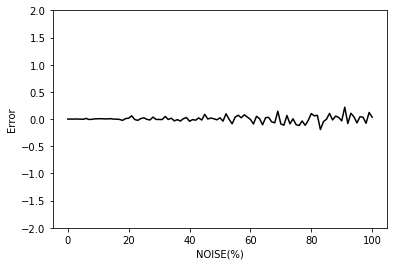

0%:0.0±0.0
10%:0.0057827509751189115±0.032855013213207246
20%:0.017110612280971778±0.08315700014410403
30%:-0.006914713347763851±0.1471858094561206
40%:-0.040955386549166854±0.1750461396992211
50%:0.023663852781132234±0.16983372574848282
60%:-0.005491392798034159±0.27612023872413843
70%:-0.0893341645499494±0.24966061543289078
80%:0.10116879433948844±0.40986198358276515
90%:-0.03200170493010607±0.39033874557212384
100%:0.035154948582524756±0.4534970117831241


In [12]:
# ガウシアンビームのパラメータ
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
x_array = np.arange(-center, center, 1.0)
fit_param_x = np.zeros((test_num, 4))
error = np.zeros((file_num, test_num))

t_fit = t_101 - 1 #x = 0の補正
for i in range(file_num):
    for k in range(test_num):
        profile_x = x_101[i][k]
        param, cov  = curve_fit(gaussian_beam, x_array, profile_x, p0=param_ini_x, maxfev=2000)
        fit_param_x[n][0] = param[0]
        fit_param_x[n][1] = param[1]
        fit_param_x[n][2] = param[2]
        fit_param_x[n][3] = param[3]
        
        error[i][k] = param[1]-t_fit[i][k]
    
ave_fit = np.average(error, axis=0)
std_fit= np.std(error, axis=0)

#結果の表示
plt.plot(test_nums, ave_fit,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_fit[i])+ "±" + str(std_fit[i])
    print(print_ave)

In [14]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise"+str(NOISE)+"-100%_fitpy.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_fit
save_data[2] = std_fit
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

In [7]:
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn3.h5"
model = load_model(save_model_path)

In [8]:
save_model_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-13_23-38_noise80.h5"
model = load_model(save_model_path)

In [7]:
ave_101_3 = np.zeros(test_num)
std_101_3 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))
pred_x = np.zeros((file_num ,test_num))
for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x[0])
ave_101_3 = np.average(error, axis=0)
std_101_3 = np.std(error, axis=0)

[0.62701255 0.63183802 0.6354596  0.63881302 0.61477137 0.64374268
 0.64643151 0.64301115 0.65844464 0.67370945 0.76145577 0.61995316
 0.63063371 0.74446243 0.64134824 0.69323581 0.69129604 0.59261274
 0.59070367 0.77020252 0.66505682 0.66501999 0.61844146 0.66067886
 0.7193225  0.69560623 0.56214178 0.64331537 0.67845988 0.72429001
 0.63406169 0.65988505 0.75000346 0.81971759 0.79822248 0.67960513
 0.76607531 0.54173511 0.69240403 0.70647109 0.86274457 0.67768717
 0.84861171 0.77214658 0.74167466 0.7158137  0.58009315 0.64339864
 0.77303082 0.83475292 0.69823265 1.02359545 0.78058392 0.51302898
 0.80573219 0.72495377 0.67934692 0.85791647 0.53895092 0.47115368
 0.75091797 0.64616579 0.71674746 0.86805189 0.57575178 0.72845948
 1.07614851 0.8173992  0.79541892 0.68801612 0.74093175 0.59069937
 1.2248559  0.72895813 0.79838586 0.6265676  0.93641579 1.02935028
 0.35755688 0.50600111 0.58897054 0.43766809 0.92993748 0.86987674
 0.69849622 0.58026934 0.42119706 0.54074997 0.89766812 0.4184

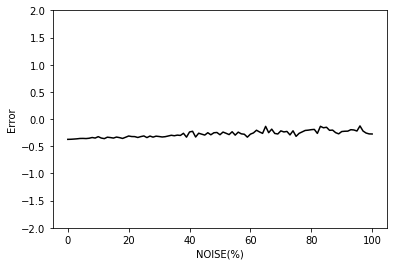

0%:-0.37298744916915894±0.0
10%:-0.3234322100877762±0.02696855407637647
20%:-0.3112278938293457±0.04330505501158932
30%:-0.3206704884767532±0.08365266287626252
40%:-0.23730396032333373±0.05924315870484302
50%:-0.2879916220903397±0.10344474913925243
60%:-0.27731165289878845±0.13039422490689298
70%:-0.2169891983270645±0.15086348860266074
80%:-0.1948781281709671±0.1657878355142409
90%:-0.229110985994339±0.17522367925411697
100%:-0.27437273859977723±0.2510776974304157


In [8]:
#結果の表示
plt.plot(test_nums, ave_101_3,  color="black")
plt.errorbar(x, y, yerr = y_err, capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w')
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,110,10):
    print_ave = str(i) + "%:" + str(ave_101_3[i])+ "±" + str(std_101_3[i])
    print(print_ave)

In [9]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise"+str(NOISE)+"-100%_3py.csv"
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = test_nums
save_data[1] = ave_101_3
save_data[2] = std_101_3
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

In [12]:
print(x_101[0][30])

[-0.05056126  0.04608152 -0.07525019 -0.00783019 -0.07415929 -0.11324447
 -0.0327903   0.05229411  0.10347329  0.01951451 -0.06220054  0.00884043
  0.06758247  0.01765581  0.09780931  0.08764758 -0.11757349 -0.10834799
 -0.10342545  0.14686372  0.05812161 -0.08819789 -0.0794285   0.00962834
 -0.11048001 -0.02918598 -0.09868958  0.07934105 -0.04075825 -0.08694647
  0.09637332 -0.02208076  0.11231975  0.08238325  0.07623202  0.02219869
 -0.11214158  0.069689   -0.03653268 -0.00205016 -0.05959695 -0.14347943
 -0.13271547 -0.06143297  0.14423176  0.26777829  0.35376847  0.50135014
  0.54393902  0.98866366  0.99340858  0.88290093  0.66609755  0.40010654
  0.20938396  0.03654023  0.17522134 -0.03785507 -0.10372954  0.13591037
  0.09301599  0.00481903  0.03191608 -0.00345621  0.10064478 -0.08118257
  0.0015853   0.05583506 -0.13486294  0.0536337   0.08778605  0.05111672
  0.06324603 -0.10083958  0.02747257 -0.08263576 -0.02176501  0.01677383
  0.00482766 -0.03123951 -0.14990376 -0.04078041  0